# 1. Regresión Lineal Simple

La regresión lineal es un algoritmo de aprendizaje supervisado que es utilizado para aproximar la relación existente entre una variable dependiente Y, m variables de independientes X y un término aleatorio que describe medidas de observación y proceso protencialmente no modelados.

## 1.1 Dependencias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 1.2. Datos

In [ ]:
dataset = pd.read_csv('salarios.csv')
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [ ]:
dataset.shape

(30, 2)

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 1.3. Modelamiento

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

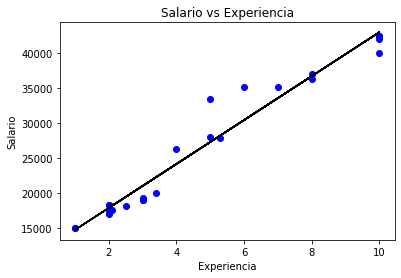

In [ ]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color='blue')
viz_train.plot(X_train, regressor.predict(X_train), color='black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

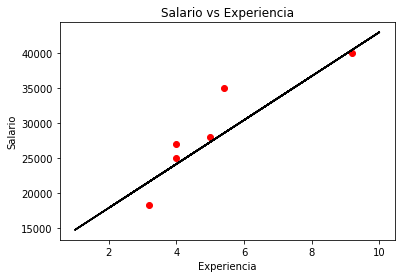

In [ ]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

## 1.4. Resultados

In [ ]:
regressor.score(X_test, Y_test)

0.7862437374732997

# 2. Regresión Logistica

## 2.1. Dependencias

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.2 Datos

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
feature_cols = ['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

## 2.3. Modelamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

## 2.4. Resultados

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta de predicción')

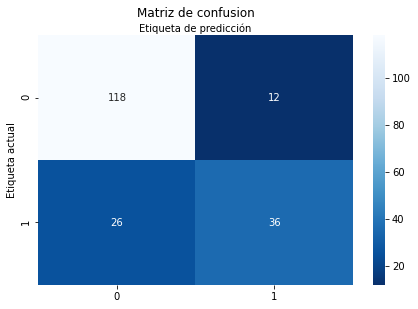

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [ ]:
print("Exactitud", metrics.balanced_accuracy_score(y_test,y_pred))

Exactitud 0.7441687344913152


# 3. Árbol de Decisión


---


Es una forma gráfica y análitica que presenta sucesos y sus posibles consecuencias.

**Ventajas:**
* Claridad en los datos
* Tolerante al ruido y valores flotantes
* Las reglas extraídas permiten hacer extracciones

**Desventajas**
* Criterio de división es eficiente
* Sobreajuste
* Rams poco significativas

**Optimización de nuestro modelo**
* Evitar el sobreajuste
* Selección efectiva de los atributos
* Campos nulos

## 3.1. Dependencia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set() #Inicializar seaborn

## 3.2. Datos

In [ ]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


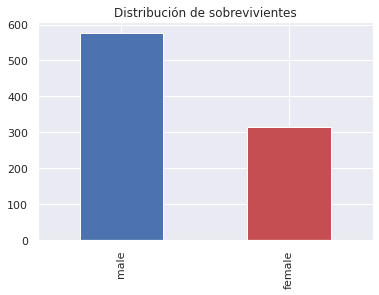

In [ ]:
train_df.Sex.value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribución de sobrevivientes')
plt.show()

## 3.3. Preprocesamiento

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [ ]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name','Ticket','Cabin'], axis=1)

categorical_cols = [cname for cname in train_predictors.columns if 
                    train_predictors[cname].nunique() < 10 and 
                    train_predictors[cname].dtype =='object'
                    ]

In [ ]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64', 'float64']
                  ]

In [ ]:
my_cols = categorical_cols + numerical_cols

train_predcitors = train_predictors[my_cols]

In [ ]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

## 3.4. Modelamiento

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size=.25, random_state=1)

In [ ]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

## 3.5. Resultados

In [ ]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print('Acurracy: %0.4f'%(tree_one_accuracy))

Acurracy: 0.9798


In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True

# 4. K-Means


---


Crea k grupos a partir de un conjunto de observaciones, los elementos deben de tener similitudes. En K-Means, se selecciona un valor para k (centroides), asignando a cada uno de los elementos restantes el centro más cercano.

**Método del codo**

* Cálcula el agrupamiento para diferentes k
* El error cuadrado para cada punto es el cuadrado de la distancia del pueste desde su centro.




## 4.1. Dependencias

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

## 4.2. Datos

In [ ]:
iris = datasets.load_iris() #Load_wines()

In [ ]:
X_iris = iris.data
Y_iris = iris.target

In [ ]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


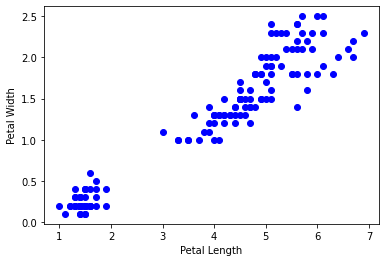

In [ ]:
plt.scatter(x['Petal Length'], x['Petal Width'], c='blue')
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)
plt.show()

## 4.3. Modelamiento

In [ ]:
model = KMeans(n_clusters = 3, max_iter=1000)
model.fit(x)
y_labels = model.labels_

In [ ]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## 4.4. Resultados

In [ ]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


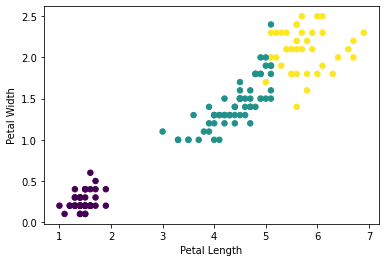

In [ ]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans, s=30)
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)
plt.show()